In [1]:
#Importing useful libraries
#Author Fatema BannatWala, Mariam Kiran, Scott Campbell
################
#TSNE plots to visulaize your data sets
#################

from __future__ import print_function
import time
import numpy as np
import pandas as pd
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

KeyboardInterrupt: 

In [18]:
# Reading the dataset

#file='NERSCHourlyBucketGatherStDevClean.csv'
#file='ALCFHourlyBucketGatherStDevClean-complete.csv'
file='datasets/Dataset-Unicauca-Version2-87Atts.csv'
dataframeloaded = pd.read_csv(file)

#For OLCF
dataframeloaded['date_wday'] = dataframeloaded['date_wday'].replace({"Monday": 1, 
                                                                     "Tuesday": 2, 
                                                                     "Wednesday": 3, 
                                                                     "Thursday": 4, 
                                                                     "Friday": 5, 
                                                                     "Saturday": 6,
                                                                     "Sunday": 7})
#For ALCF/NERSC
#dataframeloaded['date_wday'] = dataframeloaded['date_wday'].replace({"monday": 1, 
#                                                                     "tuesday": 2, 
#                                                                     "wednesday": 3, 
#                                                                     "thursday": 4, 
#                                                                     "friday": 5, 
#                                                                     "saturday": 6,
#                                                                     "sunday": 7})

# where 1 is train and 2 is test months label
y = dataframeloaded['date_month'].replace({"January": 1, 
                                      "February": 1, 
                                      "March": 2, 
                                      "April": 2, 
                                      "May": 2})
#For OLCF
dataframe_clean = dataframeloaded.drop(columns=[' info_search_time','date_mday','date_year','date_month',
                                               'date_minute','date_second','date_zone','search_name', 'search_now', 
                                               'info_min_time','info_max_time', 'info_search_time', '_time', 
                                               'host', 'index', 'info_search_time', 'linecount', 'source', 
                                               'sourcetype', 'splunk_server'])

#For ALCF/NERSC
#dataframe_clean = dataframeloaded.drop(columns=['_raw','_time','date_mday','date_minute','date_second','date_month'
#                                                'date_year','eventtype','host','index','info_max_time',
#                                                'info_min_time','info_search_time',
#                                                'linecount','search_name','search_now','source','sourcetype',
#                                                'splunk_server','splunk_server_group',
#                                                'tag','tag::eventtype','timeendpos','timestartpos'])

dataframe_clean.dropna(inplace=True)

print(dataframe_clean.shape, y.shape)


(2630, 38) (2630,)


In [19]:
### Comparison of PCA vs t-SNE 2D ###

def pca_tsne_2d(dataframe_clean, y): 

    res_col = ["date_month", "pca-2d-one", "pca-2d-two", "tsne-2d-one", "tsne-2d-two"]
    results = pd.DataFrame(columns = res_col)
    results["date_month"] = y

    # PCA implementation, 2D - Dimentionality reduced to 2

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(dataframe_clean)

    results['pca-2d-one'] = pca_result[:,0]
    results['pca-2d-two'] = pca_result[:,1] 
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    # t-SNE implementation, 2D - Dimentionality reduced to 2

    time_start = time.time()

    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(dataframe_clean)

    results['tsne-2d-one'] = tsne_results[:,0]
    results['tsne-2d-two'] = tsne_results[:,1]
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    # plotting PCA vs t-SNE

    plt.figure(figsize=(16,7))
    ax1 = plt.subplot(1, 2, 1)
    sns.scatterplot(
        x="pca-2d-one", y="pca-2d-two",
        hue="date_month",
        palette=sns.color_palette("bright", 2),
        data=results,
        legend="full",
        alpha=0.3,
        ax=ax1
    )
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="date_month",
        palette=sns.color_palette("bright", 2),
        data=results,
        legend="full",
        alpha=0.3,
        ax=ax2
    )


In [28]:
### Comparison of PCA vs t-SNE 3D ###

def pca_tsne_3d(dataframe_clean, y):
    res3_col = ["date_month", "pca-3d-one", "pca-3d-two","pca-3d-three", "tsne-3d-one", "tsne-3d-two", "tsne-3d-three"]
    results3 = pd.DataFrame(columns = res3_col)
    results3["date_month"] = y
    
    # PCA implementation, 3D - Dimentionality reduced to 3

    pca3 = PCA(n_components=3)
    pca3_result = pca3.fit_transform(dataframe_clean)

    results3['pca-3d-one'] = pca3_result[:,0]
    results3['pca-3d-two'] = pca3_result[:,1] 
    results3['pca-3d-three'] = pca3_result[:,2] 
    print('Explained variation per principal component: {}'.format(pca3.explained_variance_ratio_))

    # t-SNE implementation, 3D - Dimentionality reduced to 3

    time_start = time.time()

    tsne3 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne3_results = tsne3.fit_transform(dataframe_clean)

    results3['tsne-3d-one'] = tsne3_results[:,0]
    results3['tsne-3d-two'] = tsne3_results[:,1]
    results3['tsne-3d-three'] = tsne3_results[:,2]
    #print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    # plotting PCA 3D
    fig = plt.figure(figsize=(18,7))
    
    ax = fig.add_subplot(1,2,1, projection='3d')
    scatter = ax.scatter(
        xs=results3['pca-3d-one'], 
        ys=results3['pca-3d-two'], 
        zs=results3['pca-3d-three'], 
        c=results3['date_month'], 
        cmap='tab10'
    )

    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="date_month")
    ax.add_artist(legend1)
 
    ax.set_xlabel('pca-3d-one', fontsize=15, labelpad=13)
    ax.set_ylabel('pca-3d-two', fontsize=15, labelpad=13)
    ax.set_zlabel('pca-3d-three', fontsize=15, labelpad=10)

    # plotting t-SNE 3D
    ax = fig.add_subplot(1,2,2, projection='3d')
    scatter = ax.scatter(
        xs=results3['tsne-3d-one'], 
        ys=results3['tsne-3d-two'], 
        zs=results3['tsne-3d-three'], 
        c=results3['date_month'], 
        cmap='tab10'
    )
    legend2 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="date_month")
    ax.add_artist(legend2)
 
    ax.set_xlabel('tsne-3d-one', fontsize=15, labelpad=13)
    ax.set_ylabel('tsne-3d-two', fontsize=15, labelpad=13)
    ax.set_zlabel('tsne-3d-three', fontsize=15, labelpad=10)
    
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    ax.set_zlim([-10,10])
    
    ax.xaxis.set_ticks(np.arange(-10, 10, 3))
    ax.yaxis.set_ticks(np.arange(-10, 10, 3))
    ax.zaxis.set_ticks(np.arange(-10, 10, 3))
    
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.zaxis.set_tick_params(labelsize=14)
    #plt.xticks(fontsize=16)
    #plt.yticks(fontsize=16)
    #plt.zticks(fontsize=16)
    
    plt.show()

Explained variation per principal component: [0.76082202 0.23862461]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2630 samples in 0.004s...
[t-SNE] Computed neighbors for 2630 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2630
[t-SNE] Computed conditional probabilities for sample 2000 / 2630
[t-SNE] Computed conditional probabilities for sample 2630 / 2630
[t-SNE] Mean sigma: 3442113.817674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.245552
[t-SNE] KL divergence after 300 iterations: 0.921643
t-SNE done! Time elapsed: 2.292546033859253 seconds
Explained variation per principal component: [7.60822024e-01 2.38624607e-01 5.46980108e-04]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2630 samples in 0.003s...
[t-SNE] Computed neighbors for 2630 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2630
[t-SNE] Computed conditional probabilities for sample 2000 / 2630
[t-SNE]

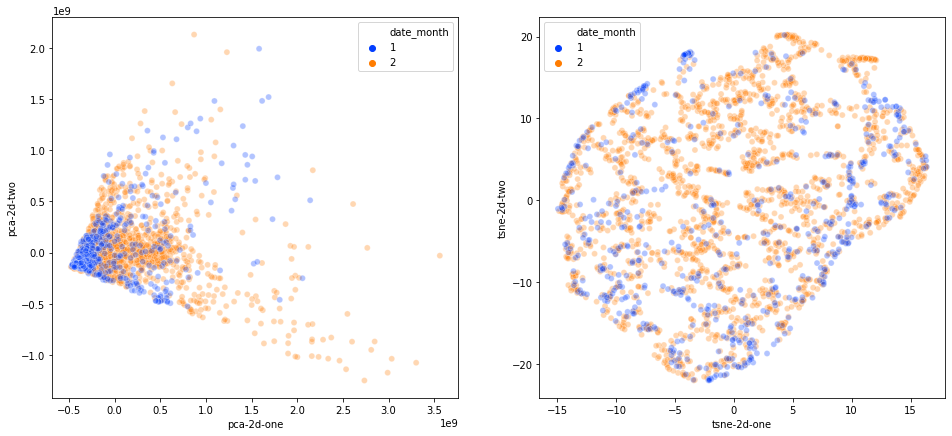

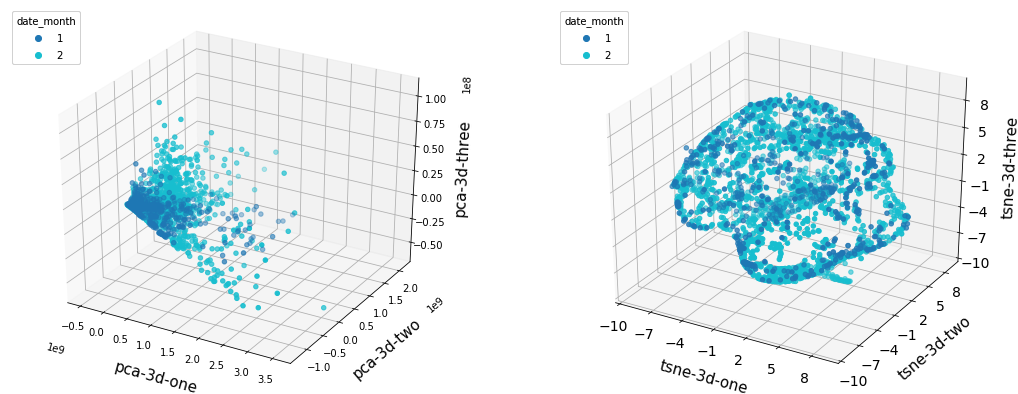

In [29]:
# Reducing the Dimentiality using PCA and t-SNE to 2
pca_tsne_2d(dataframe_clean, y)

# Reducing the Dimentiality using PCA and t-SNE to 3
pca_tsne_3d(dataframe_clean, y)